In [1]:
#importando bibliotecas
import random
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pytrends.request import TrendReq

In [6]:
#temporizador para evitar chamadas da bibliotecas pytrends repetidamente (pensar em outras soluções)
import time
time.sleep(20)

In [3]:
#configurando pytrends
pytrends = TrendReq(hl='pt-BR', tz=180, geo='BR')
palavra_chave = ['economia']
categorias = 0
tempo = 'today 1-m'
regiao = 'BR'

In [4]:
#configurando nuvem de palavras
def criar_nuvem_palavras():
    #construindo o payload da pesquisa
    pytrends.build_payload(palavra_chave, cat=categorias, timeframe=tempo, geo=regiao)

    #extraindo os dados da pesquisa
    tópicos_relacionados_dict = pytrends.related_topics()
    tópicos = tópicos_relacionados_dict[palavra_chave[0]]['top']
    termos = tópicos['topic_title'].values.tolist()

    #excluindo palavras sem utilidade na busca
    termos_excluidos = ['a', 'o', 'ao', 'da', 'do', 'de', 'um', 'uma','analysis', 'renault', 'mastercard']
    termos = [termo for termo in termos if not any(word.lower() in termos_excluidos for word in termo.split())]

    #excluindo a palavra-chave da lista de termos
    termos = [termo for termo in termos if termo.lower() != palavra_chave[0].lower()]

    #variável para a nuvem de palavras
    texto = " ".join(termos)

    #gerando a nuvem de palavras
    lista_cores = ['blue', 'purple', 'gray', 'pink']
    random.shuffle(lista_cores)
    nuvem_palavras = WordCloud(width=450, height=450,
                               background_color='white',
                               max_words=50,
                               colormap='Pastel1',
                               color_func=lambda *args,
                               **kwargs: random.choice(lista_cores),
                               font_step=2,
                               min_font_size=10, max_font_size=50).generate(texto)

    #plotando a nuvem de palavras
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(nuvem_palavras)
    plt.axis("off")
    plt.tight_layout(pad=0)

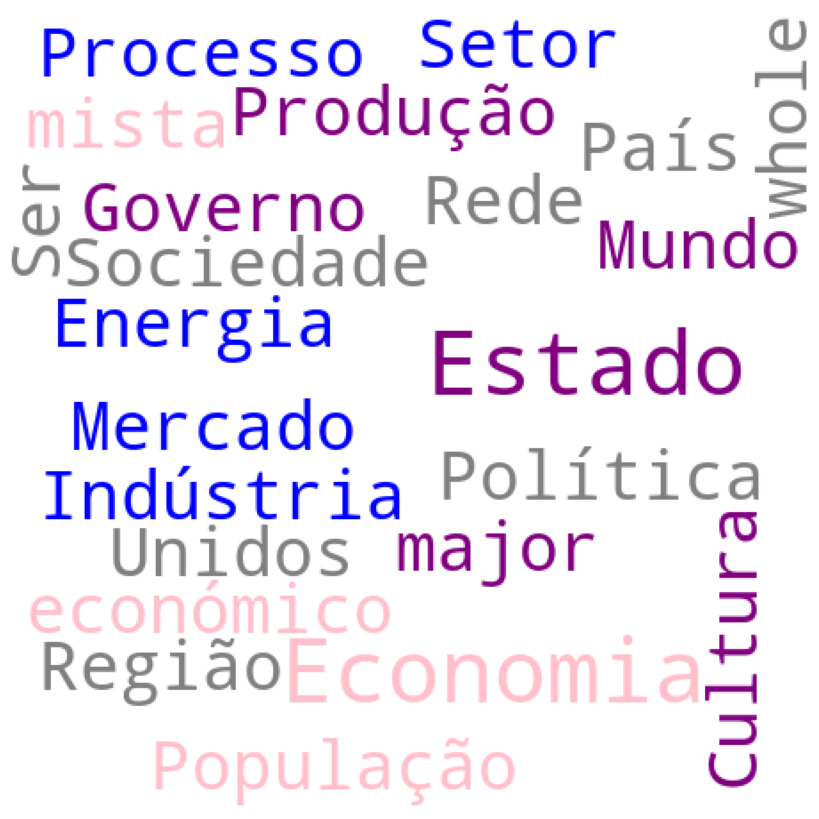

In [5]:
#gerando a nuvem de palavras
criar_nuvem_palavras()